<a href="https://colab.research.google.com/github/anhxd/ml-learning-pathway/blob/main/Students_Performance_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#input data
data = pd.read_csv("StudentsPerformance.csv")
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.shape

(1000, 8)

In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
print(data.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [8]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [9]:
data.iloc[:,1].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [10]:
data.iloc[:,2].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [11]:
data.iloc[:,3].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [12]:
data.iloc[:,4].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [13]:


male = data[data['gender'] == 'male']
female = data[data['gender'] != 'male']

print("Math Score")
print("Male    :",round(male['math score'].sum()/len(male),3))
print("Female  :",round(female['math score'].sum()/len(female),3),'\n')

print("Reading Score")
print("Male    :",round(male['reading score'].sum()/len(male),3))
print("Female  :",round(female['reading score'].sum()/len(female),3),'\n')

print("Writing Score")
print("Male    :",round(male['writing score'].sum()/len(male),3))
print("Female  :",round(female['writing score'].sum()/len(female),3))

Math Score
Male    : 68.728
Female  : 63.633 

Reading Score
Male    : 65.473
Female  : 72.608 

Writing Score
Male    : 63.311
Female  : 72.467


In [14]:
scores = pd.DataFrame(data['math score'] + data['reading score'] + data['writing score'], columns = ["total score"])
scores = pd.merge(data,scores, left_index = True, right_index = True).sort_values(by=['total score'],ascending=False)
scores.head(30)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
179,female,group D,some high school,standard,completed,97,100,100,297
712,female,group D,some college,standard,none,98,100,99,297
165,female,group C,bachelor's degree,standard,completed,96,100,100,296
625,male,group D,some college,standard,completed,100,97,99,296
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293


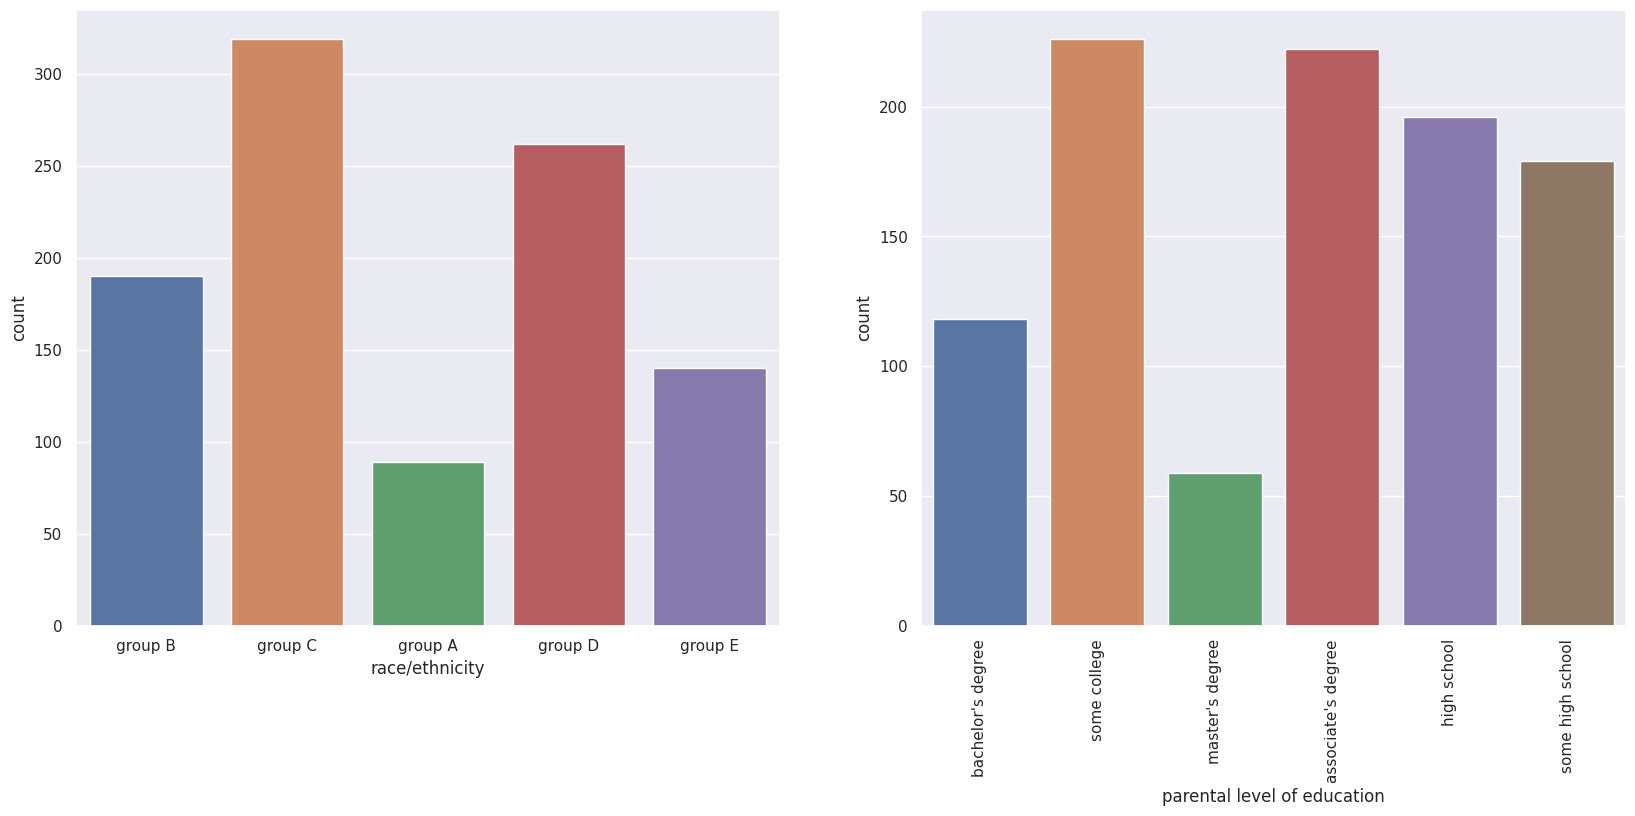

In [15]:
sns.set(style="darkgrid")
f, axs = plt.subplots(1,2, figsize = (20,8))

sns.countplot(x = 'race/ethnicity', data = data, ax = axs[0])
sns.countplot(x = 'parental level of education', data = data, ax = axs[1])

plt.xticks(rotation=90)

plt.show()

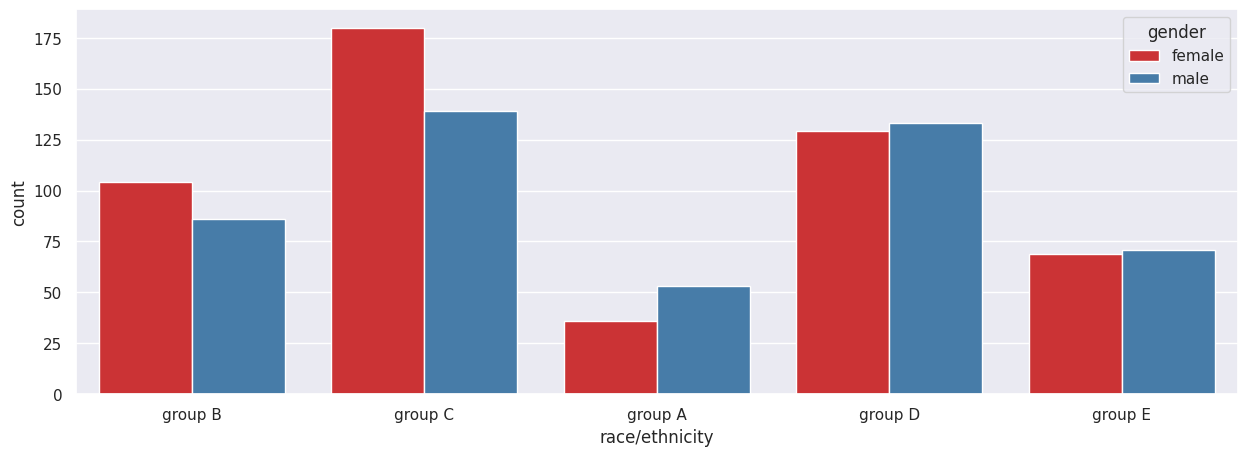

In [16]:
f, ax = plt.subplots(1,1, figsize = (15,5))

sns.countplot(x = 'race/ethnicity', data = data, hue = 'gender', palette = 'Set1')

plt.show()

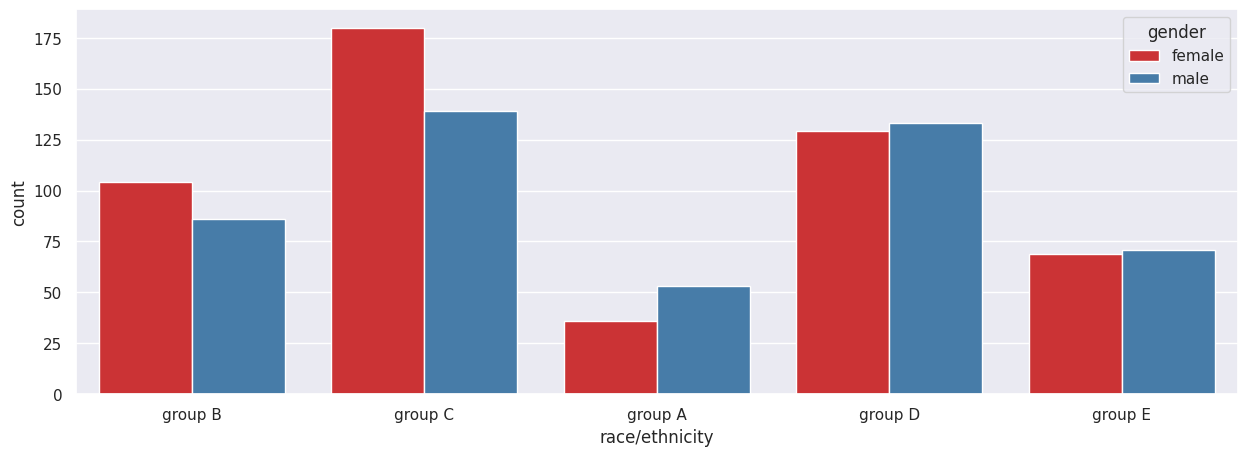

In [17]:
f, ax = plt.subplots(1,1, figsize = (15,5))

sns.countplot(x = 'race/ethnicity', data = data, hue = 'gender', palette = 'Set1') #race / ethnicity

plt.show()

<ipython-input-19-da7f503906b6>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(x = 'math score', y='gender', data = data, palette = 'Set1') #math score


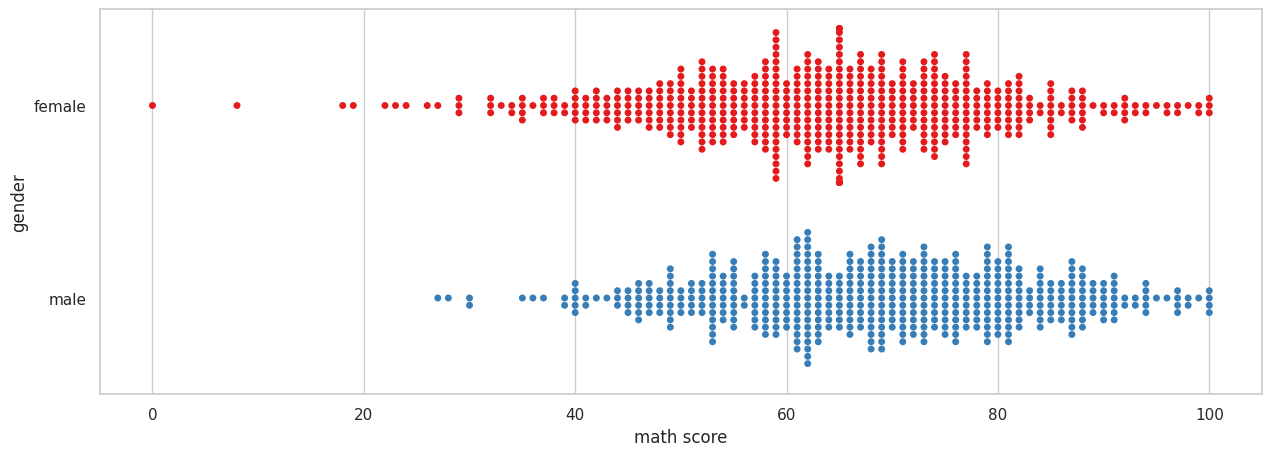

<ipython-input-19-da7f503906b6>:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(x = 'reading score', y='gender', data = data, palette = 'Set1') #reading score


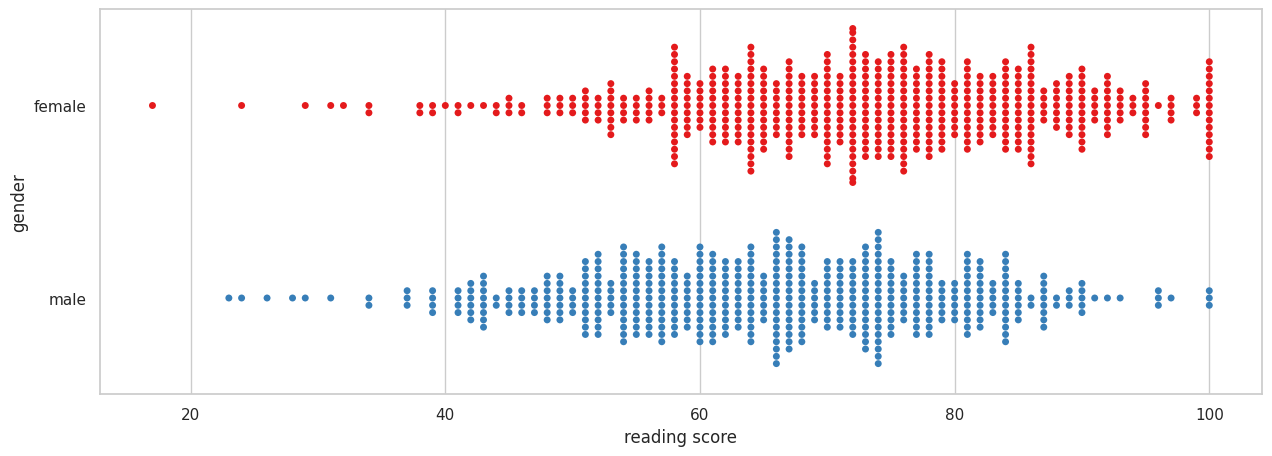

<ipython-input-19-da7f503906b6>:12: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(x = 'writing score', y='gender', data = data, palette = 'Set1') #writing score


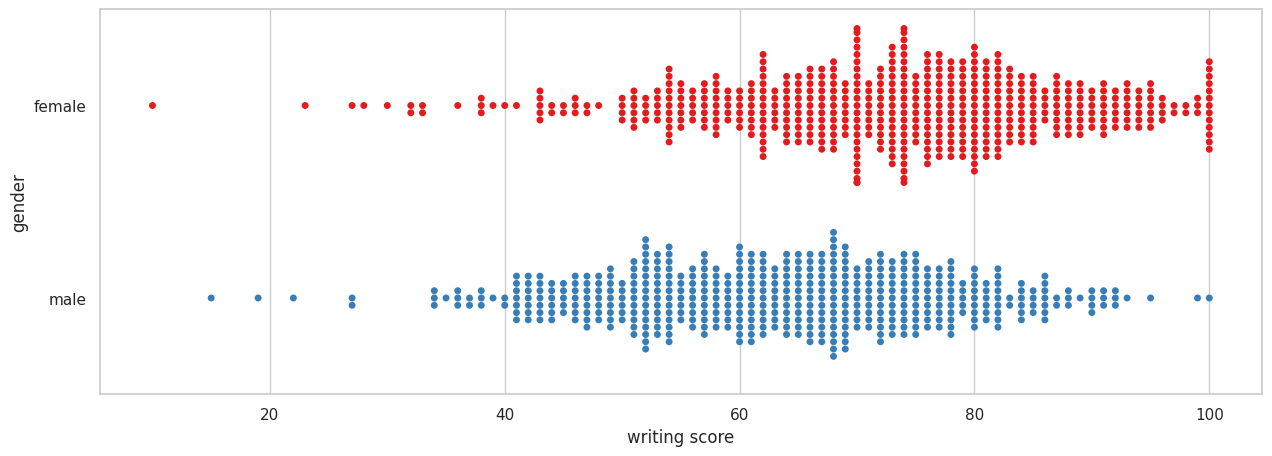

In [19]:
sns.set_style('whitegrid')

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'math score', y='gender', data = data, palette = 'Set1')
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'reading score', y='gender', data = data, palette = 'Set1')
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'writing score', y='gender', data = data, palette = 'Set1')
plt.show()


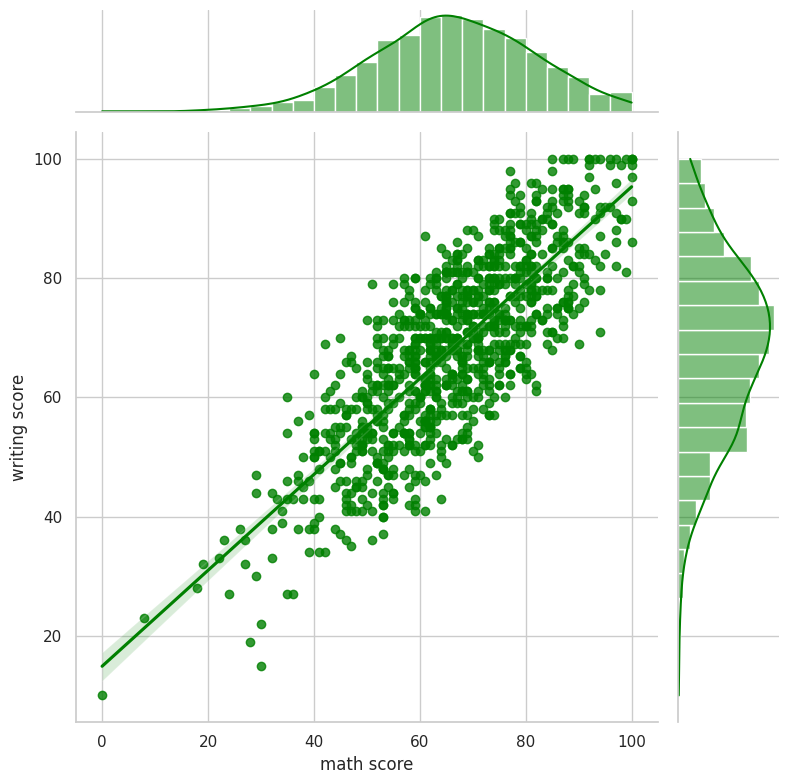

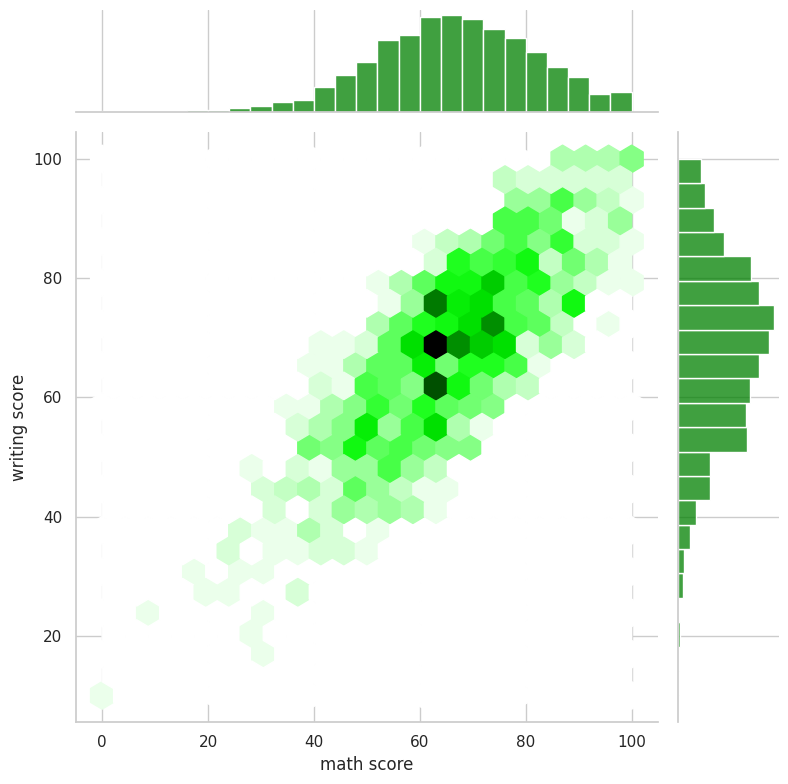

In [20]:
sns.jointplot(x ='math score', y = 'writing score', data = data, color = 'green', height = 8, kind = 'reg')
sns.jointplot(x ='math score', y = 'writing score', data = data, color = 'green', height = 8, kind = 'hex')

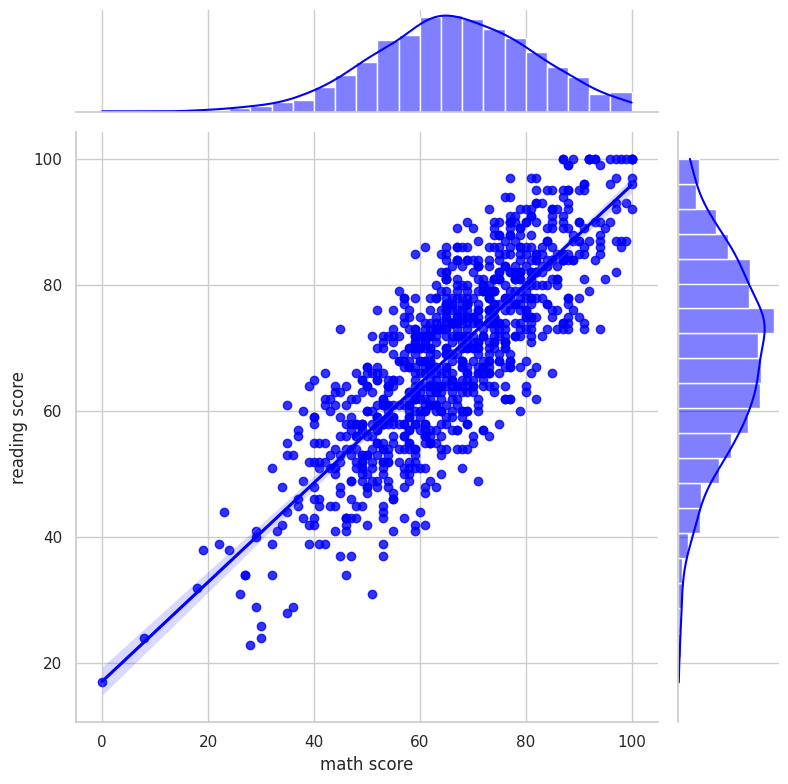

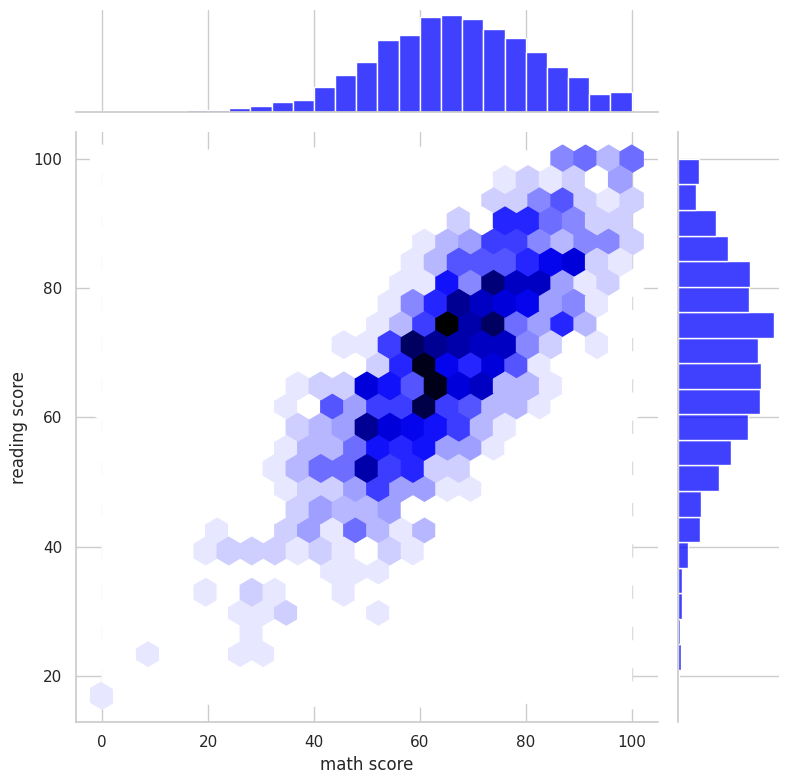

In [21]:
sns.jointplot(x ='math score', y = 'reading score', data = data, color = 'blue', height = 8, kind = 'reg')
sns.jointplot(x ='math score', y = 'reading score', data = data, color = 'blue', height = 8, kind = 'hex')

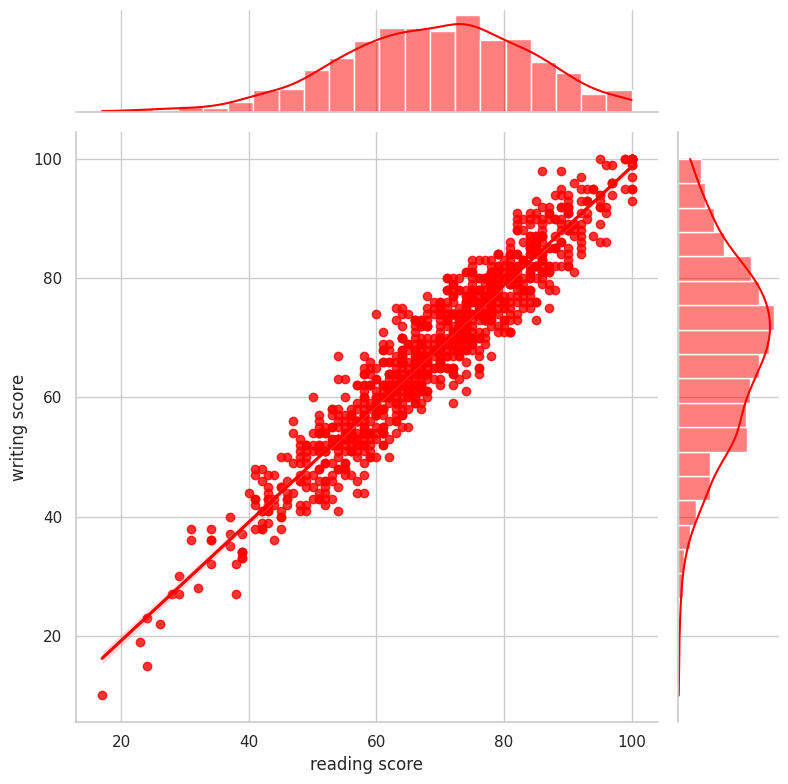

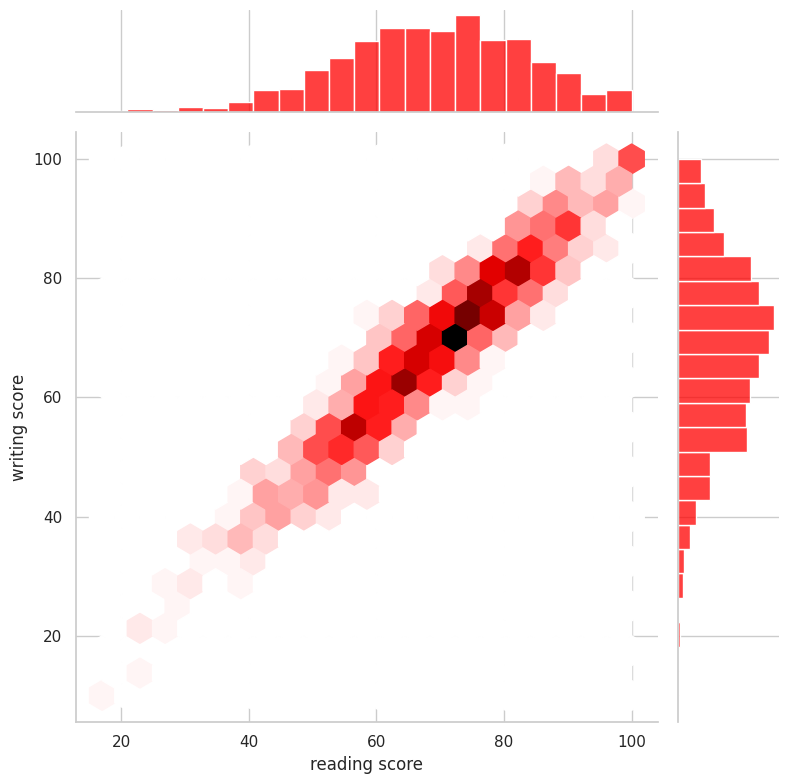

In [22]:
sns.jointplot(x ='reading score', y = 'writing score', data = data, color = 'red', height = 8, kind = 'reg')
sns.jointplot(x ='reading score', y = 'writing score', data = data, color = 'red', height = 8, kind = 'hex')

In [24]:

passed = len(data[data['math score'] >= 60])
not_passed = 1000 - passed

percentage1 = [passed, not_passed]


passed = len(data[data['reading score'] >= 60])
not_passed = 1000 - passed

percentage2 = [passed, not_passed]


passed = len(data[data['writing score'] >= 60])
not_passed = 1000 - passed

percentage3 = [passed, not_passed]

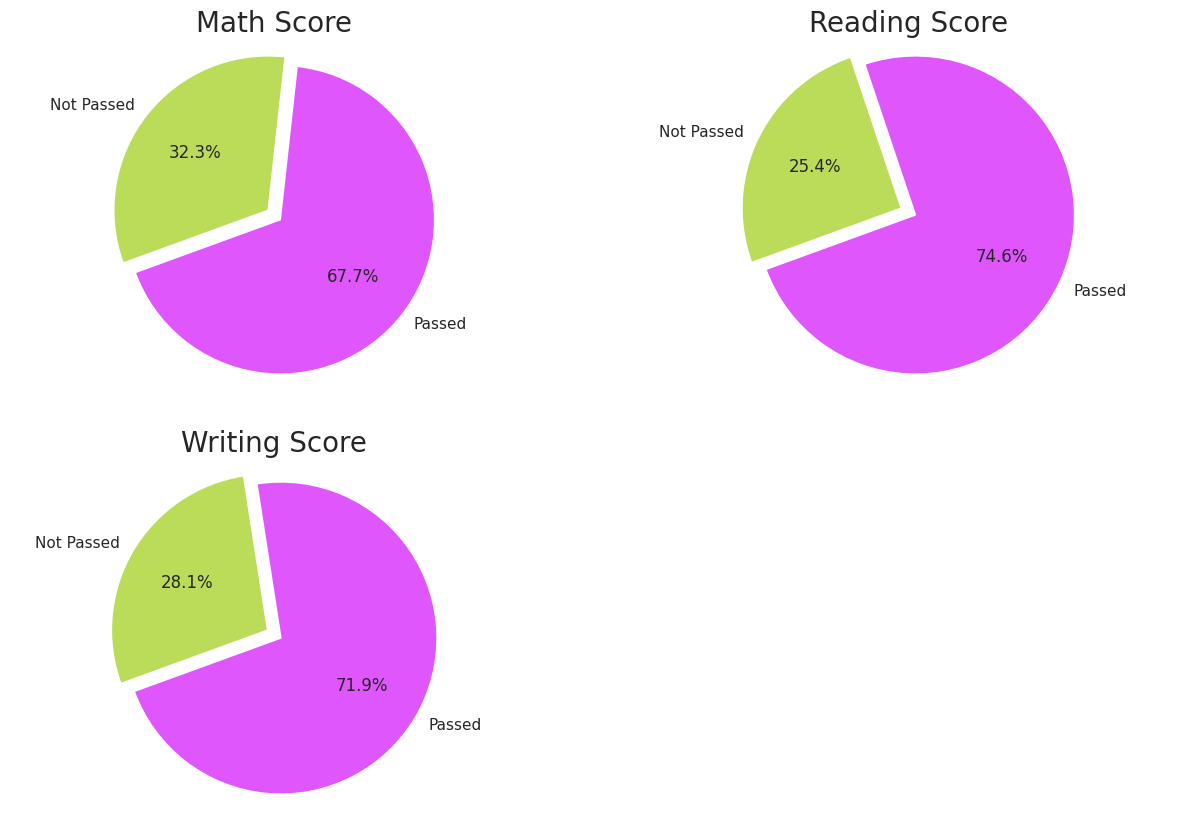

In [25]:
labels = "Passed", "Not Passed"

f, axs = plt.subplots(2,2, figsize=(15,10))


axs[0,0].pie(percentage1, labels = labels, explode=(0.05,0.05), autopct = '%1.1f%%', startangle = 200, colors = ["#e056fd", "#badc58"])
axs[0,0].set_title("Math Score", size = 20)
axs[0,0].axis('equal')


axs[0,1].pie(percentage2, labels = labels, explode=(0.05,0.05), autopct = '%1.1f%%', startangle = 200, colors = ["#e056fd", "#badc58"])
axs[0,1].set_title("Reading Score", size = 20)
axs[0,1].axis('equal')


axs[1,0].pie(percentage3, labels = labels, explode=(0.05,0.05), autopct = '%1.1f%%', startangle = 200, colors = ["#e056fd", "#badc58"])
axs[1,0].set_title("Writing Score", size = 20)
axs[1,0].axis('equal')

f.delaxes(axs[1,1])

plt.show()

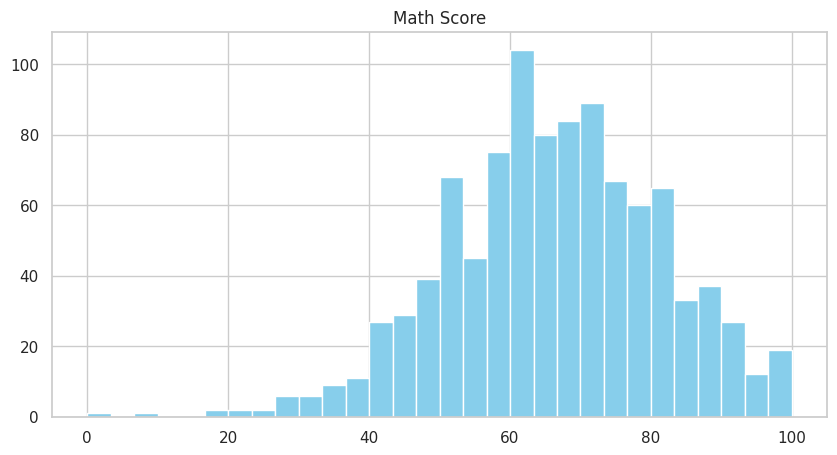

In [26]:
f, ax = plt.subplots(1,1,figsize=(10,5))

plt.hist(data['math score'], 30, color = 'skyblue')
ax.set(title = "Math Score")

plt.show()